# 1. Configuración del ambiente

In [46]:
#Pablo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 2. Preprocesamiento de datos

In [47]:
#Pablo
global df_banco, resultados
dataset = pd.read_csv('german_credit.csv')
df_banco = dataset.copy()
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [48]:
#Pablo
#Verificamos las estructuras de datos y si hay nulos
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

Eliminamos duplicados

In [49]:
#Pablo
#Verificamos si hay duplicados
df_banco.duplicated().sum()

0

In [50]:
#Pablo
#Verificamos si hay nulos
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [51]:
#Pablo
#Creamos la función procesar_datos() y la ejecutamos luego y vemos el resultado almacenado en df_blanco()
def procesar_datos():
  df_banco.drop_duplicates()
  df_banco.dropna()

  dictionaries = [
    {
      'column_name': 'account_check_status',
      'values': {
        '< 0 DM': 1,
        '0 <= ... < 200 DM': 2,
        '>= 200 DM / salary assignments for at least 1 year': 3,
        'no checking account': 4
      }
    },
    {
      'column_name': 'credit_history',
      'values': {
        'no credits taken/ all credits paid back duly': 1,
        'all credits at this bank paid back duly': 2,
        'existing credits paid back duly till now': 3,
        'delay in paying off in the past': 4,
        'critical account/ other credits existing (not at this bank)': 5,
      }       
    },
    {
      'column_name': 'purpose',
      'values': {
        'car (new)': 1,
        'car (used)': 2,
        'furniture/equipment': 3,
        'radio/television': 4,
        'domestic appliances': 5,
        'repairs': 6,
        'education': 7,
        '(vacation - does not exist?)': 8,
        'retraining': 9,
        'business': 10,
        'others': 11
      }
    },
    {
      'column_name': 'savings',
      'values': {
        '... < 100 DM': 5,
        '100 <= ... < 500 DM': 4,
        '500 <= ... < 1000 DM ': 3,
        '.. >= 1000 DM ': 2,
        'unknown/ no savings account': 1
      }
    },
    {
      'column_name': 'present_emp_since',
      'values': {
        'unemployed': 5,
        '... < 1 year ': 4,
        '1 <= ... < 4 years': 3,
        '4 <= ... < 7 years': 2,
        '.. >= 7 years': 1,
      }
    },
    {
      'column_name': 'personal_status_sex',
      'values': {
        'male : divorced/separated': 1,
        'female : divorced/separated/married': 2,
        'male : single': 3,
        'male : married/widowed': 4,
        'female : single	': 5
      }
    },
    {
      'column_name': 'other_debtors',
      'values': {
        'none': 1,
        'co-applicant': 2,
        'guarantor': 3
      }
    },
    {
      'column_name': 'property',
      'values': {
        'real estate': 1,
        'if not A121 : building society savings agreement/ life insurance': 2,
        'if not A121/A122 : car or other, not in attribute 6': 3,
        'unknown / no property': 4,
      }
    },
    {
      'column_name': 'other_installment_plans',
      'values': {
        'bank': 1,
        'stores': 2,
        'none': 3
      }
    },
    {
      'column_name': 'housing',
      'values': {
        'rent': 1,
        'own': 2,
        'for free': 3
      }
    },
    {
      'column_name': 'job',
      'values': {
        'unemployed/ unskilled - non-resident': 1,
        'unskilled - resident': 2,
        'skilled employee / official': 3,
        'management/ self-employed/ highly qualified employee/ officer': 4
      }
    },
    {
      'column_name': 'telephone',
      'values': {
        'none': 0,
        'yes, registered under the customers name ': 1
      }
    },
    {
      'column_name': 'foreign_worker',
      'values': {
        'yes': 1,
        'no': 0
      }
    }
  ]

  for item in dictionaries:
    column = item['column_name']
    new_values = item['values']
    df_banco[column] = df_banco[column].map(new_values)

procesar_datos()
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,1


In [52]:
#Pablo
#Verificamos si después de la sustitución quedó algún valor nulo
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [53]:
#Pablo
#Verificamos si las estructuras de datos de las columnas son las correctas
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

In [54]:
# Pablo
print('lkajsdfkljsdklfjskldfjlks')
print('probando un cambio nuevo con rama bloqueada')

lkajsdfkljsdklfjskldfjlks
probando un cambio nuevo con rama bloqueada


# 3. Exploración de datos

In [55]:
#edwin
def feature_engineering(df_banco):
    #mapeando el sexo 
    sex_mapping = {1: 0,  2: 1,  3: 0,  4: 0,  5: 1}
    # Crear variable de variable sexo
    df_banco['sexo'] = df_banco['personal_status_sex'].map(sex_mapping)
    #mapeando el estado
    civil_mapping = {1: 0, 2: 0, 3: 1, 4: 0, 5: 1}
    #creacion de variable estado_civil
    df_banco['estado_civil']= df_banco['personal_status_sex'].map(civil_mapping)

    #creacion de rango de edad
    df_banco['rango_edad'] = pd.cut(x = df_banco['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])

    #creacion de variable rango_plazos_credito
    df_banco['rango_plazos_credito'] = pd.cut(x = df_banco['duration_in_month'], bins=[1,12,24,36,48,60,72], labels = [1,2,3,4,5,6])

    #creditos y rangos
    creditos = [1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,
            11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]
    niveles = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    #creacion de variable rango_valor_credito
    df_banco['rango_valor_credito'] = pd.cut(x= df_banco['credit_amount'], bins=creditos, labels=niveles)
    columnas_a_eliminar = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount']
    df_banco = df_banco.drop(columns=columnas_a_eliminar, axis=1)

    return df_banco


In [56]:
#edwin
df_bank = feature_engineering(df_banco)
df_bank.head(10)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,...,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,...,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,...,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,...,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,...,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,...,2,3,2,0,1,0,1,4,2,5
5,0,4,3,8,1,3,2,1,4,4,...,1,2,2,1,1,0,1,2,3,10
6,0,4,3,4,3,1,3,1,4,2,...,1,3,1,0,1,0,1,4,2,3
7,0,2,3,2,5,3,2,1,2,3,...,1,4,1,1,1,0,1,2,3,7
8,0,4,3,5,2,2,2,1,4,1,...,1,2,1,0,1,0,0,5,1,4
9,1,2,5,1,5,5,4,1,2,3,...,2,4,1,0,1,0,0,1,3,6


In [57]:
#edwin
def analisis_exploratorio(df_bank):
    # Histogramas
    area=plt.figure(figsize=(20, 20))
    g1 = area.add_subplot(2,2,1)
    g2 = area.add_subplot(2,2,2)
    g3 = area.add_subplot(2,2,3)
    g4 = area.add_subplot(2,2,4)

    g1.hist(df_bank.sexo)    #histograma del sexo de la población
    g1.set_title('Histograma de sexo de la población')
    g2.hist(df_bank.estado_civil)  #histograma del estado civil de la población
    g2.set_title('Histograma del estado civil de la población')
    g3.hist(df_bank.rango_plazos_credito) #histograma de los plazos de credito
    g3.set_title('Histograma de los plazos de credito')
    g4.hist(df_bank.rango_edad)  #histograma del rango de edad
    g4.set_title('Histograma del rango de edades de la población')

    #default
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_banco, x='default')
    plt.title('Histograma default')
    plt.show()

    # Gráfico de correlación
    correlacion = df_banco.corr()

    plt.figure(figsize=(20, 20))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Matriz de Correlación')
    plt.show()

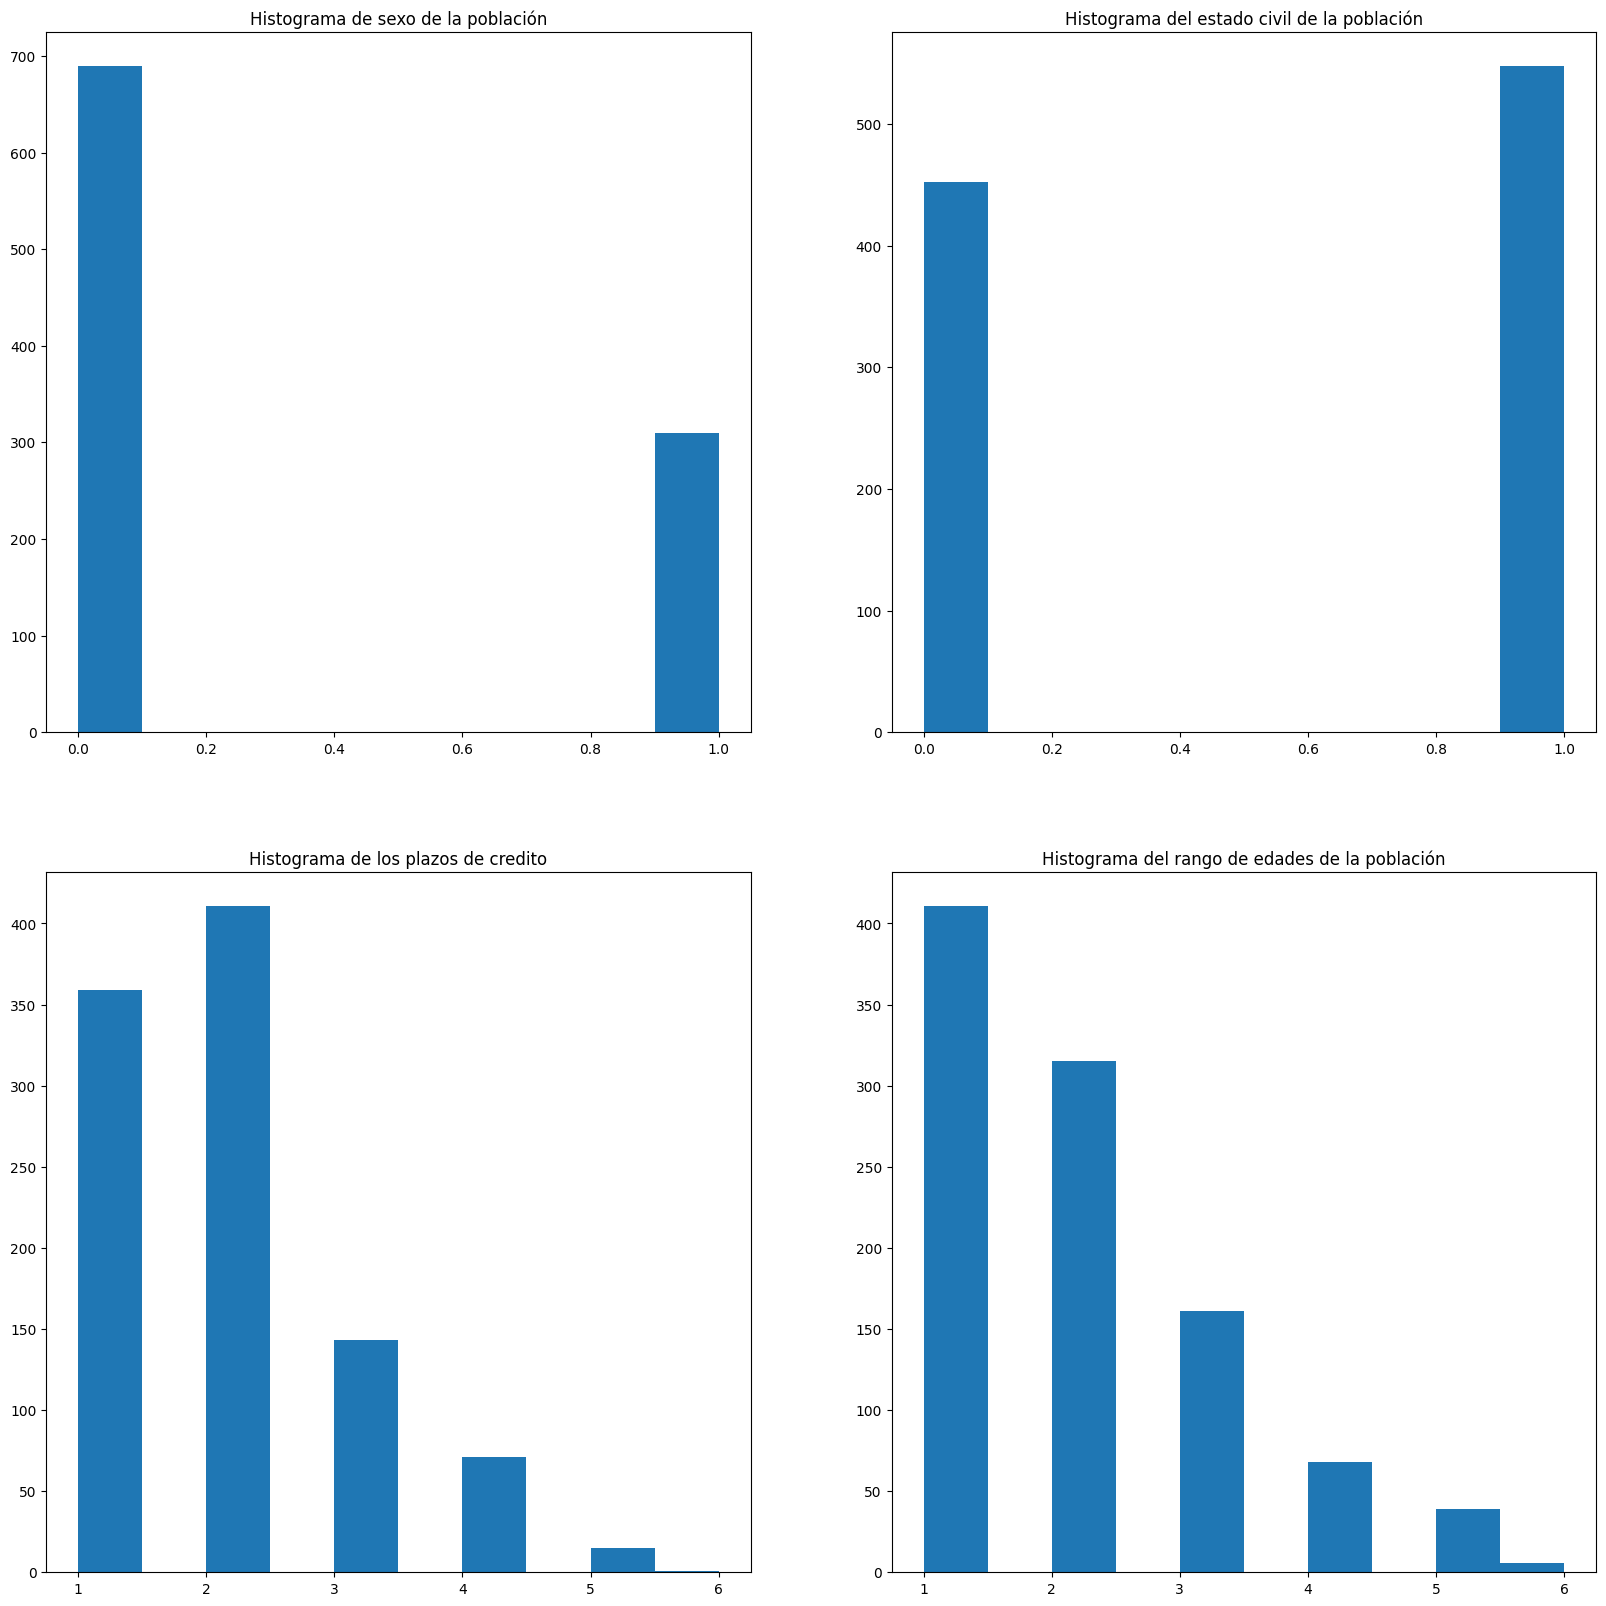

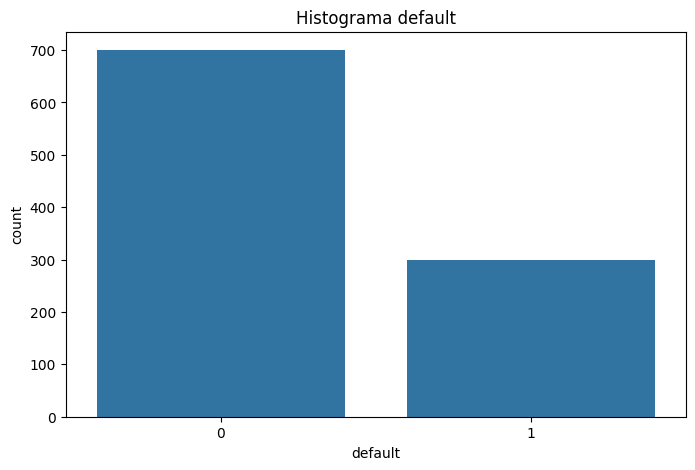

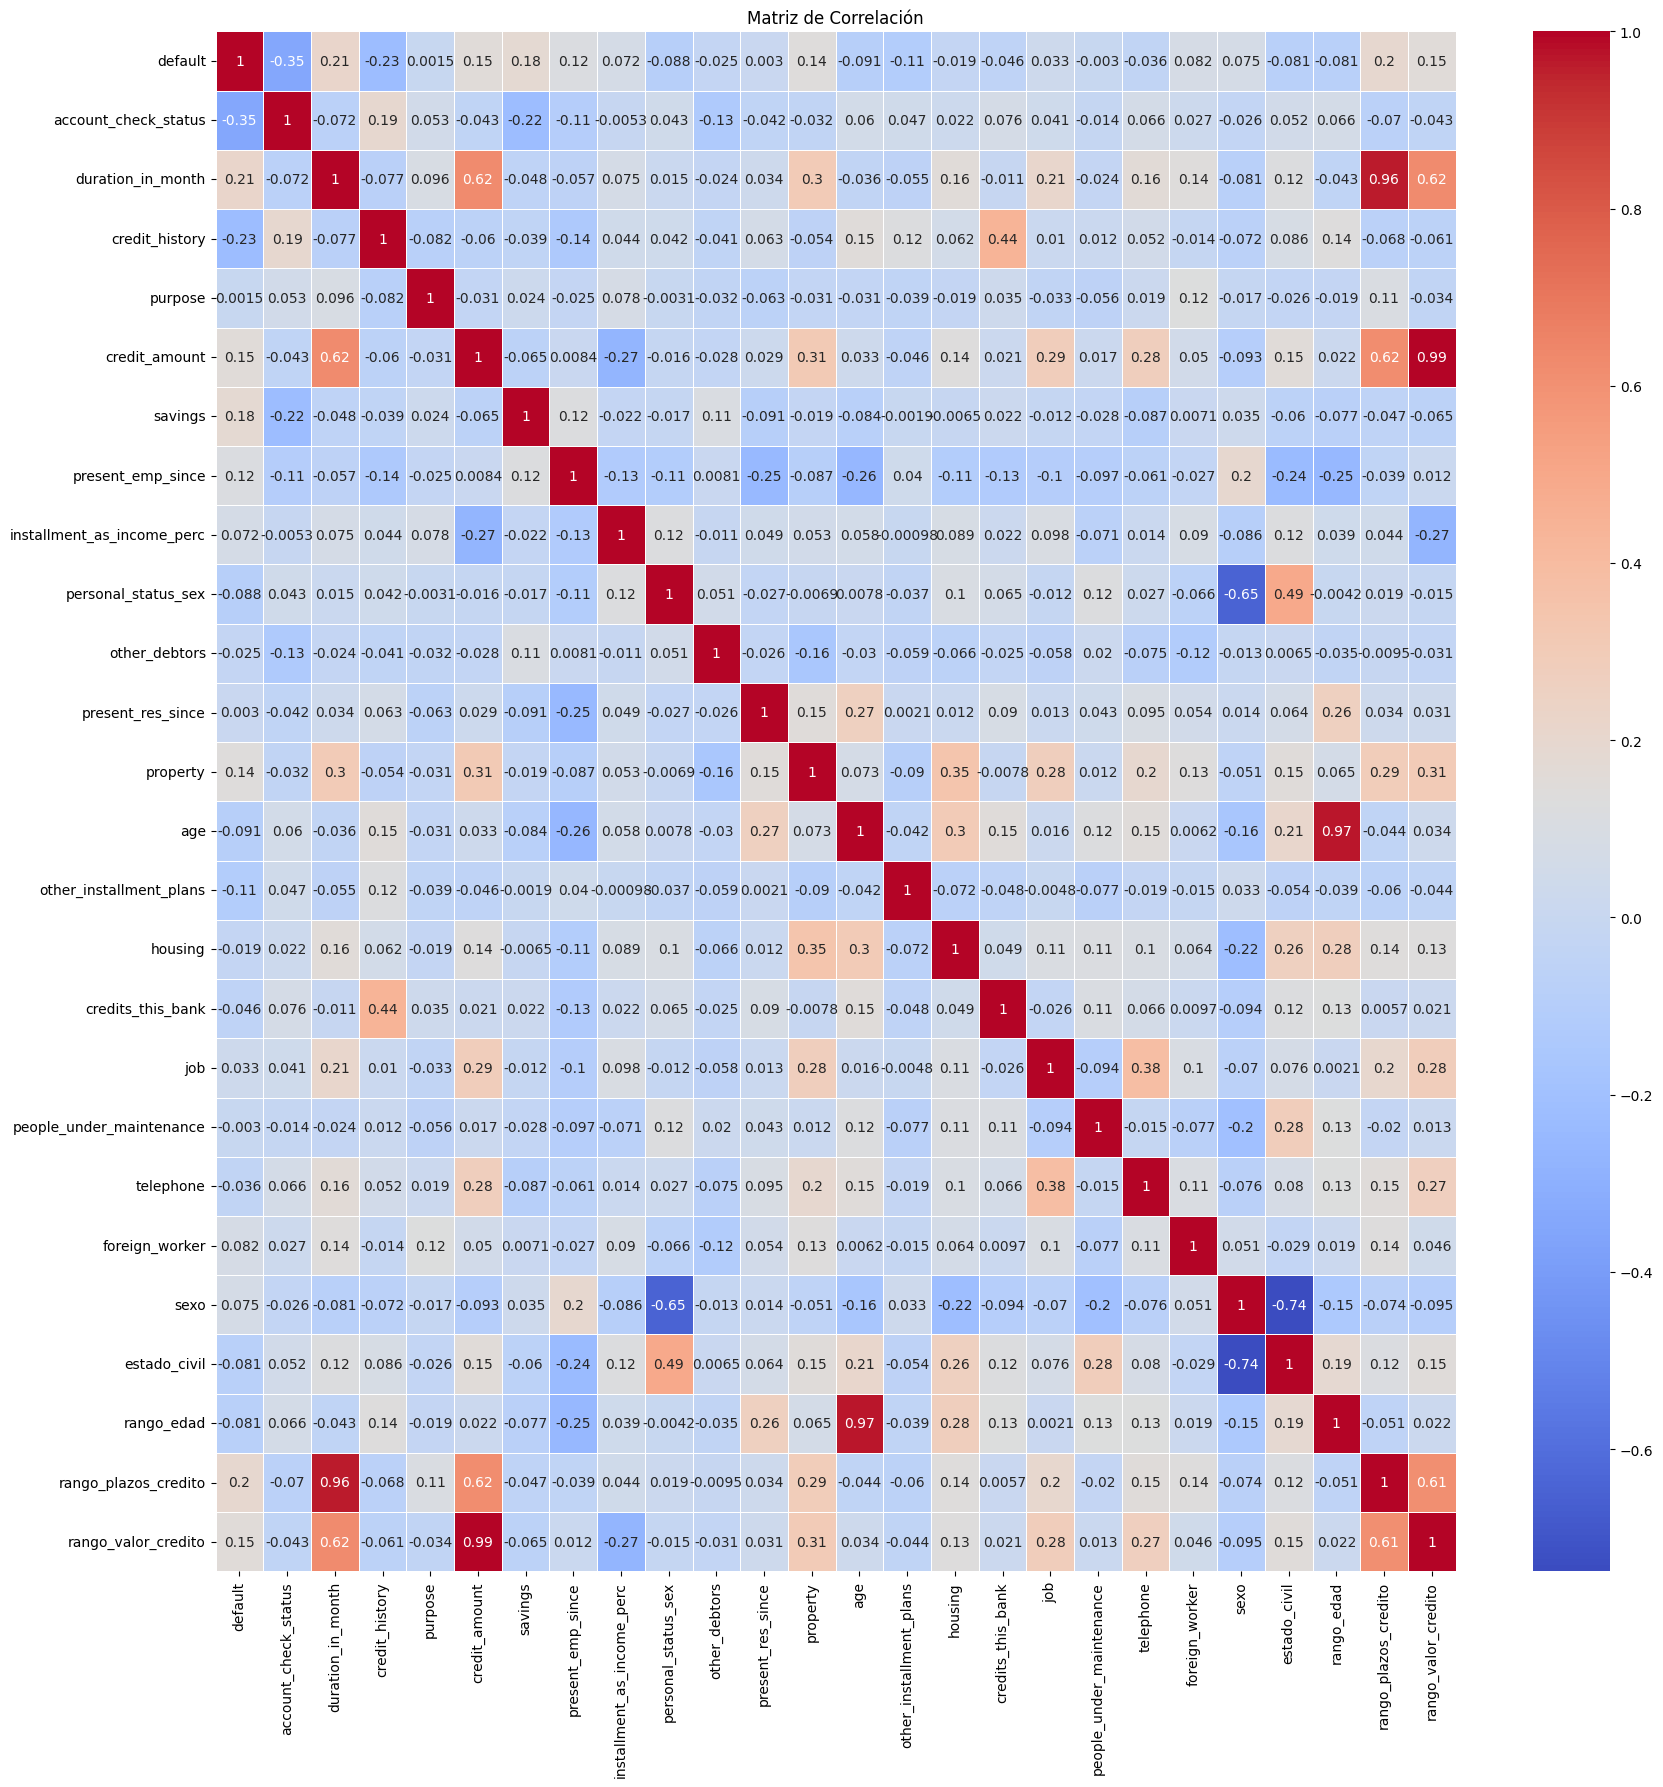

In [58]:
#edwin
analisis_exploratorio(df_bank)

# 4. Construcción de los modelos

# 5. Evaluación y Selección de los modelos